# Case study: Feature Engineering - Ames house price prediction

In [1]:
# used for manipulating directory paths
import os

# For N-dimensional array manipulation
import numpy as np

# For advanced mathematical routines
import scipy

# Plotting library
import matplotlib.pyplot as plt

# For data analysis and data structures in DataFrames 
import pandas as pd

# For data visualization
import seaborn as sns

# For machine learning algorithms and evaluation metrics
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics


# tells matplotlib to embed plots within the notebook
%matplotlib inline


## Steps

- *Step 1: Load dataset*<br>
- *Step 2: Exploratory data analysis and process dataset for ML*<br>
- *Step 3: Linear regression*<br>
- *Step 4: Train and evaluate a simple linear regression model*<br>
- *Step 5: Refine model using regularization*<br>

In [2]:
# Step 1 Load dataset 
## Implement a function to load dataset
def loadDataset(dirname, filename):
    df = pd.read_csv(dirname + filename)
    return df

In [3]:

house_data_df = loadDataset('Data/','train.csv')

## Brielfy look at the data using 'shape', 'head', 'info' etc, functions. 

house_data_df.shape

#house_data_df.info()

#house_data_df.head(10)

#house_data_df.describe()

# Print the count of values in 'Street' using value_counts() 
#house_data_df['Street'].value_counts()

# Drop the 'Id' column 

house_data_df.drop(['Id'],axis=1, inplace = True)

# print the new dataframe shape

print('Shape after dropping ID: \n', house_data_df.shape)


Shape after dropping ID: 
 (1460, 80)


Text(0.5, 1.02, 'Histograms of numerical features')

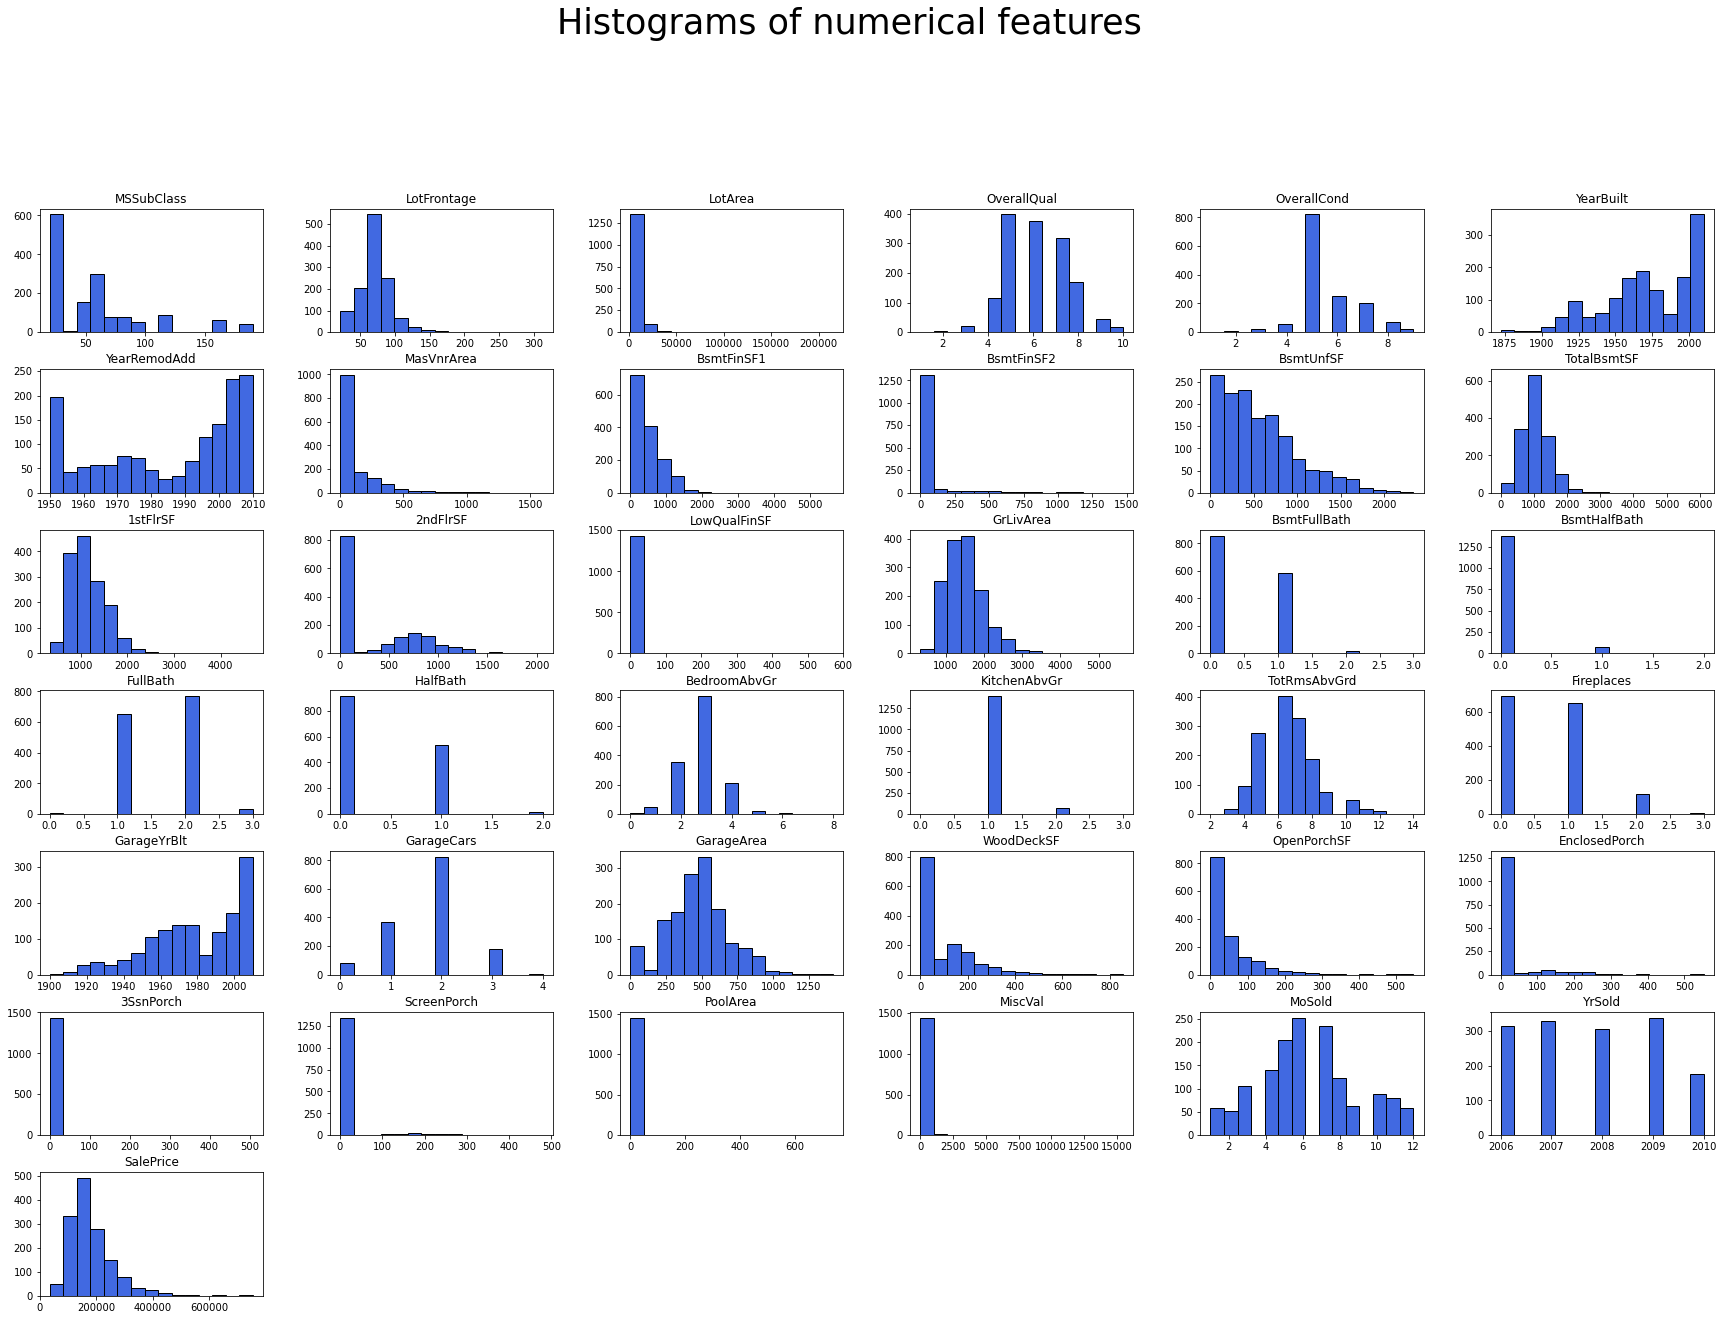

In [4]:
## Step 2 Visualize data to gain insights (Histograms)

# Plot histogram of numerical features using DataFrame.hist(figsize=(30,20)). 

house_data_df.hist(figsize=(30, 20), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Histograms of numerical features', x = 0.5, y = 1.02, size = 35)


In [15]:
## Step 2 Visualize data to gain insights  (Correlations)

# Check correlation of 'SalePrice' with others features using DataFrame.corr()
# check each column value 
feature_corr = house_data_df[['SalePrice','MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

feature_corr = feature_corr.corr()
#feature_corr.sort_values(by='SalePrice', ascending = False)
feature_corr[['SalePrice']].sort_values('SalePrice', ascending = False)

# or 
#feature_corr = house_data_df.corr()
#descending_feature_corr = feature_corr.unstack()
#descending_feature_corr = descending_feature_corr.sort_values(kind="quicksort", ascending=False)
#print(descending_feature_corr["SalePrice"])


,SalePrice
SalePrice,1.000000
OverallQual,0.800858
GrLivArea,0.720516
GarageCars,0.649256
TotalBsmtSF,0.646584
GarageArea,0.636964
1stFlrSF,0.625235
FullBath,0.559048
TotRmsAbvGrd,0.537462
YearBuilt,0.535279


<AxesSubplot:>

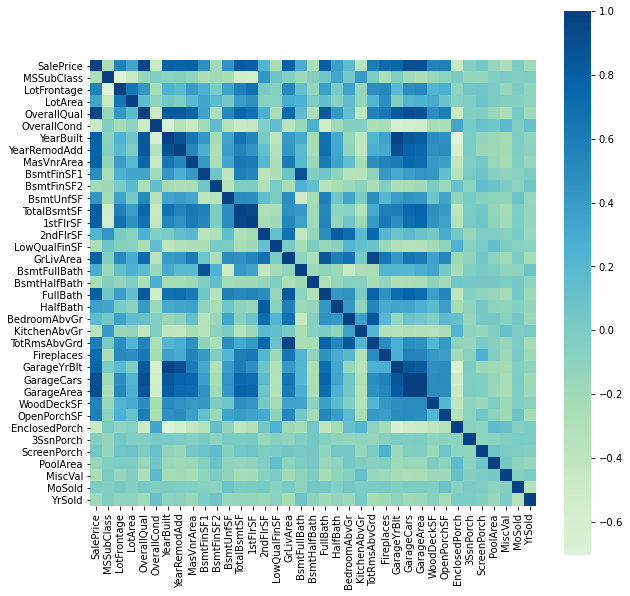

In [16]:
correlation = feature_corr.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1, center=0,square=True,cmap = 'GnBu')

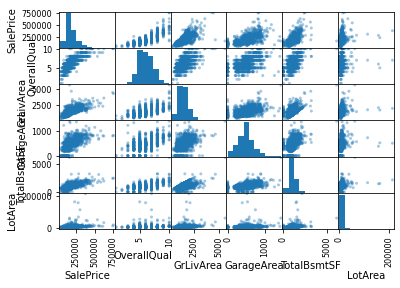

In [7]:
## Step 2 Visualize data to gain insights (Scatterplots)

from pandas.plotting import scatter_matrix
scatter_features = ['SalePrice','OverallQual','GrLivArea','GarageArea','TotalBsmtSF','LotArea']
pd.plotting.scatter_matrix(house_data_df[scatter_features], alpha=0.4)
plt.show()


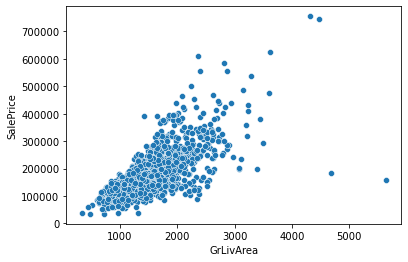

In [8]:
## Step2 Visualize data to gain insights (scatterplot-detailed)
# other solution
#data = pd.concat([house_data_df['SalePrice'], house_data_df['GrLivArea']], axis=1)
#data.plot.scatter(x='GrLivArea', y='SalePrice',ylim=(0,800000));

sns.scatterplot(x='GrLivArea', y='SalePrice', data = house_data_df)
plt.show()


In [9]:
# Removing houses with GrLivArea of more than 4000, as these contain outliers
df_outlier = house_data_df.loc[house_data_df['GrLivArea'] > 4000]
house_data_df = house_data_df.drop(df_outlier.index)
print(house_data_df.shape)


(1456, 80)


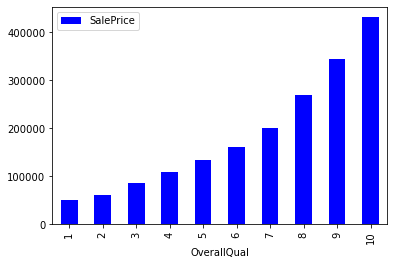

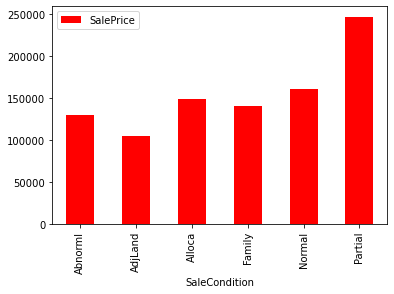

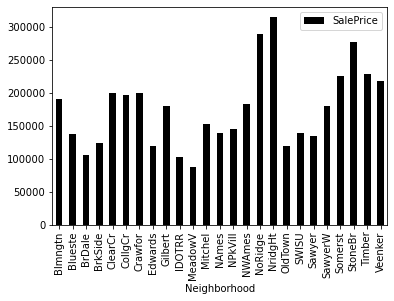

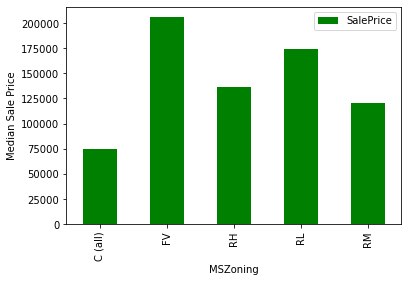

In [10]:
## Step 2 Visualize data to gain insights (Pivot table)

# Plot pivot tables using DataFrame.pivot_table() 

# Pivot table to investigate relationship of OveralQual and SalePrice
quality_pivot = house_data_df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',label='Overall Quality',color='blue')

# Pivot table to evaluate relationship of SaleCondition and SalePrice
quality_pivot = house_data_df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',label='SaleCondition',color='red')

# Pivot table to evaluate relationship of Neighborhood and SalePrice
quality_pivot = house_data_df.pivot_table(index='Neighborhood', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',label='Neighborhood',color='black')

# Pivot table to evaluate relationship of MSZoning and SalePrice
quality_pivot = house_data_df.pivot_table(index='MSZoning', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',label='MSZoning',color='green')

plt.ylabel('Median Sale Price')
plt.show()

In [11]:
# Separating features and target from house dataset 
house_data_features = house_data_df.drop(columns='SalePrice', axis =1) 
house_data_target = house_data_df["SalePrice"].copy() 
house_data_target.columns = ['SalePrice']

# Print DataFrame shape of features and target variable
print('Shape of features: \n', house_data_features.shape)
print('Shape of target: \n', house_data_target.shape)
house_data_features.info()

Shape of features: 
 (1456, 79)
Shape of target: 
 (1456,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64 

In [12]:
# Function to check for missing values
def checkMissing(df):
    """
    Checks missing value in a panda's dataframe and returns count
    
    Parameters
     ----------
    df: Object
        A panda's DataFrame to check for missing values
        
    Returns
     ----------
    missing: Object
            A panda's object with count of missing values
            
    """
    missing_count = df.isna().sum().sort_values(ascending= False)
    missing_count = missing_count[missing_count != 0]
    return missing_count
    

# Checking for missing values in features
print(checkMissing(house_data_features))

# Print DataFrame shape of features and target variable
print('Shape of features (1456, 79): \n', house_data_features.shape)
print('Shape of target (1456,): \n', house_data_target.shape)

PoolQC          1451
MiscFeature     1402
Alley           1365
Fence           1176
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
Shape of features (1456, 79): 
 (1456, 79)
Shape of target (1456,): 
 (1456,)


In [13]:
## Step 3.1 Numeric features (Data cleaning - Handling missing values)

numeric_features= house_data_features.select_dtypes(include=[np.number])

print(numeric_features.shape)

# Print numeric_features with missing values using the 'checkMissing()' function created above 
print(checkMissing(numeric_features))

(1456, 36)
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64


In [14]:
## Step 3.1.1 Handling missing values of numeric features

# Fill nulls for 'LotFrontage' with median value calculated after grouping by 'Neighborhood'
house_data_features["LotFrontage"] = house_data_features.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# Fill nulls for 'GarageYrBlt','MasVnrArea' with 0

for col in ('GarageYrBlt', 'MasVnrArea'):
    house_data_features[col] = house_data_features[col].fillna(0)

# Check that features LotFrontage, GarageYrBl and MasVnrArea are no longer in missing value list 
print(checkMissing(house_data_features))

# Print DataFrame shape of features and target variable
print('Shape of features (1456, 79): \n', house_data_features.shape)
print('Shape of target (1456,): \n', house_data_target.shape)

PoolQC          1451
MiscFeature     1402
Alley           1365
Fence           1176
FireplaceQu      690
GarageType        81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64
Shape of features (1456, 79): 
 (1456, 79)
Shape of target (1456,): 
 (1456,)


In [15]:
## Step 3.1.2 Feature Engineering for Numeric features (log-transformation)

# Check skewness of the target variable
print("Skew (no log transform): 1.565959 \n", house_data_target.skew())

# Apply log-transform on target feature 'SalePrice' using 'np.log()' function (Execute only once)
house_data_target = np.log(house_data_target)

# Check skewness of the target variable after log-transform
print("Skew (log transform): 0.065448 \n", house_data_target.skew())

# Print DataFrame shape of features and target variable
print('Shape of features (1456, 79): \n', house_data_features.shape)
print('Shape of target (1456,): \n', house_data_target.shape)

Skew (no log transform): 1.565959 
 1.5659592925562151
Skew (log transform): 0.065448 
 0.06544882031646646
Shape of features (1456, 79): 
 (1456, 79)
Shape of target (1456,): 
 (1456,)


In [16]:
## Step 3.2 Feature Engineering for Categorical features (Handling missing values)

# Transform some numerical features that are actually categorical
for col in ['OverallQual','MSSubClass','OverallCond']:
    house_data_features[col].apply(str)

# Create a new object 'categorical_features' from house_data_features that contains only categorical features

categorical_features= house_data_features.select_dtypes(exclude=[np.number])


#for col in ('PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtCond','BsmtQual','MasVnrType'):
    #house_data_features[col] = house_data_features[col].fillna('None')

print(checkMissing(categorical_features))

# Print missing values in categorical features using the checkMissing() function
#print(categorical_features.isnull().sum().sort_values(ascending=False))

print("Numeric features shape (1456, 36): \n", numeric_features.shape)
print("Categorical features shape (1456, 43): \n", categorical_features.shape)
print("House data features shape (1456,79): \n", house_data_features.shape)

PoolQC          1451
MiscFeature     1402
Alley           1365
Fence           1176
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
dtype: int64
Numeric features shape (1456, 36): 
 (1456, 36)
Categorical features shape (1456, 43): 
 (1456, 43)
House data features shape (1456,79): 
 (1456, 79)


In [17]:
## Step 3.2 Feature Engineering for Categorical features (Handling missing values)

# Fill nulls for the missing values in the specified categorical features according to the 
# data description above (3.2.1).
# Note the special description for feature 'Electrical'.

for col in ('PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtCond','BsmtQual'):
    house_data_features[col].fillna('None',inplace= True)

house_data_features['Electrical'].fillna('SBrkr', inplace = True)

# Check that there are no nulls in the dataframe 
print(checkMissing(house_data_features))

BsmtFinType1    37
MasVnrType       8
dtype: int64


In [18]:
## Step 3.2 Feature Engineering for Categorical features (one-hot encoding)

# Print the shape of dataset before one-hot encoding
print('Shape of features before one-hot encoding (1456,79):\n', house_data_features.shape)

# Perform binning and convert values of 'OverallQual and OverallCond' features

house_data_features['OverallQual']= house_data_features['OverallQual'].map({1:"Poor",2:'Poor',3:'Fair',4:'Average',5:'Average',6:'Good',7:'Good',8:'Excellent',9:'Excellent',10:'Excellent'})
print(house_data_features['OverallQual'])
house_data_features['OverallCond']= house_data_features['OverallCond'].map({1:"Poor",2:'Poor',3:'Fair',4:'Average',5:'Average',6:'Good',7:'Good',8:'Excellent',9:'Excellent',10:'Excellent'})
print(house_data_features['OverallCond'])

# another solution
'''
house_data_features['OverallQual'].replace([1, 2], "Poor", inplace = True)
house_data_features['OverallQual'].replace([3], "Fair", inplace = True)
house_data_features['OverallQual'].replace([4, 5], "Average", inplace = True)
house_data_features['OverallQual'].replace([6, 7], "Good", inplace = True)
house_data_features['OverallQual'].replace([8, 9, 10], "Excellent", inplace = True)

house_data_features['OverallCond'].replace([1, 2], "Poor", inplace = True)
house_data_features['OverallCond'].replace([3], "Fair", inplace = True)
house_data_features['OverallCond'].replace([4, 5], "Average", inplace = True)
house_data_features['OverallCond'].replace([6, 7], "Good", inplace = True)
house_data_features['OverallCond'].replace([8, 9, 10], "Excellent", inplace = True)
'''
# Perform one-hot encoding on all categorical features
categorical = []
for col in categorical_features.columns:
    categorical.append(col)
categorical.append('OverallCond')
categorical.append('OverallQual')

for col in categorical:
    house_data_features = pd.get_dummies(house_data_features, columns=[col])

# Print DataFrame shape of features and target variable
print('Shape of features after one-hot encoding:\n', house_data_features.shape)


Shape of features before one-hot encoding (1456,79):
 (1456, 79)
0            Good
1            Good
2            Good
3            Good
4       Excellent
          ...    
1455         Good
1456         Good
1457         Good
1458      Average
1459      Average
Name: OverallQual, Length: 1456, dtype: object
0         Average
1       Excellent
2         Average
3         Average
4         Average
          ...    
1455      Average
1456         Good
1457    Excellent
1458         Good
1459         Good
Name: OverallCond, Length: 1456, dtype: object
Shape of features after one-hot encoding:
 (1456, 308)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
## Task 4 Train and Evaluate a simple linear regression model

#  Split dataset in training set (X_train, y_train) and test set (X_test, y_test)

X = house_data_features
y = house_data_target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Train a simple linear regression model 'lr' with training set
lr = LinearRegression()
lr.fit(X_train, y_train)
#lr.score(X_train, y_train)

# Third, print model weights(coefficients) and intercept
print("Model intercept (lr.intercept): \n ", lr.intercept_)
print("Model weights (lr.coef_) : \n ", lr.coef_)



(1164, 308) (1164,) (292, 308) (292,)
Model intercept (lr.intercept): 
  8.605960452411612
Model weights (lr.coef_) : 
  [ 6.91121756e-05  5.45954841e-04  2.84307531e-06  1.89583496e-03
  1.22112414e-03  1.39526024e-05  5.50417955e-05  2.17697781e-05
  1.07858452e-05  8.75977115e-05  1.02033490e-04  9.29969288e-05
 -5.36810986e-05  1.41349358e-04  3.00886446e-02  2.08016996e-02
  2.02551983e-02  1.80834661e-02  1.30806447e-03 -4.42751708e-02
  5.44491984e-03  1.89580723e-02 -1.57787780e-04  2.24921439e-02
  9.50033743e-05  1.22988979e-04  1.02730126e-04  9.62861572e-05
  1.95062143e-04  2.66868625e-04  2.49715750e-04  1.30880250e-05
 -4.60758535e-04 -1.97202010e-03 -3.48822662e-01  1.30352712e-01
  9.86048793e-02  8.77788121e-02  3.20862587e-02 -4.58175322e-02
  4.58175322e-02 -1.68664212e-03 -6.49116875e-03  8.17781086e-03
  1.21847891e-02  1.12016229e-02 -2.98400274e-02  6.45361542e-03
  3.13488791e-02 -2.04460475e-02 -2.38947049e-02  1.29918733e-02
  1.28629384e-01 -1.28629384e-01  

R^2 score on trainig set:  0.946090999554027
MSE score on trainig set:  0.008083320085922519
R^2 score on test set: 0.8913688710715012
MSE score on test set:  0.014723634506256793


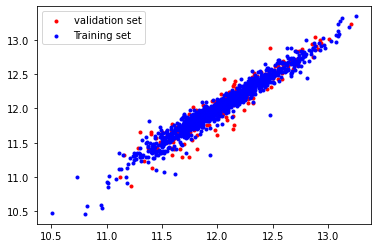

In [20]:
## Step 4 Train and Evaluate a simple linear regression mode

# Use the trained simple model to make predictions 'pred_test' on test set 'X_test' using the trained model 
# ===== YOUR CODE HERE ==========
pred_test = lr.predict(X_test)

# Evaluate model performance using R^2 and mean squared error on training set i.e., pred_train, y_train
pred_train = lr.predict(X_train)
R_square_train = r2_score(pred_train,y_train)
MSE_train = mean_squared_error(pred_train,y_train)

print("R^2 score on trainig set: ", R_square_train)
print("MSE score on trainig set: ", MSE_train)


# Evaluate model performance using R^2 and mean squared error on test set i.e., pred_test, y_test
# ===== YOUR CODE HERE ==========

R_square_test = r2_score(pred_test, y_test)
MSE_test = mean_squared_error(pred_test, y_test)

print("R^2 score on test set:", R_square_test)
print("MSE score on test set: ", MSE_test)


# Plot the linear model
plt.scatter(pred_test, y_test, color='red', marker='.', label = "validation set")
plt.scatter(pred_train, y_train, color='blue', marker='.', label = "Training set")
plt.legend()
plt.show()


In [21]:
## Step 5 Model refinement with regularization (Ridge regression)
from sklearn.linear_model import Ridge

# Train a ridge regression model 'ridge' with training set
lr_ridge = Ridge(alpha=0.05, random_state=0)
lr_ridge.fit(X_train, y_train)


# Make predictions 'ridge_pred_train' on train set 'X_train' using the trained model and calculate the R^2
ridge_pred_train = lr_ridge.predict(X_train)
R_square_train_ridge = r2_score(ridge_pred_train,y_train)

print("R^2 score on training set: ", R_square_train_ridge)


# Make predictions 'ridge_pred_test' on test set 'X_test' using the trained model and calculate the R^2
ridge_pred_test = lr_ridge.predict(X_test)
R_square_test_ridge =  r2_score(ridge_pred_test,y_test)

print("R^2 score on test set: ", R_square_test_ridge)


R^2 score on training set:  0.945988601327299
R^2 score on test set:  0.8941027857741486


In [22]:
## Step 5 Model refinement with regularization (Lasso)

from sklearn.linear_model import Lasso

# Train a Lasso model 'lasso' with training set
lsr= Lasso(alpha= 0.0001)
lsr.fit(X_train, y_train)

# Make predictions 'ridge_pred_train' on train set 'X_train' using the trained model and calculate the R^2
lasso_pred_train = lsr.predict(X_train)
R_square_train_lasso = r2_score(lasso_pred_train, y_train)

print("R^2 score on trainig set: ", R_square_train_lasso)


# Make predictions 'ridge_pred_test' on test set 'X_test' using the trained model and calculate the R^2
lasso_pred_test = lsr.predict(X_test)
R_square_test_lasso = r2_score(lasso_pred_test,y_test)

print("R^2 score on test set: ", R_square_test_lasso)

# Check the number of features the model is training with
print("Number of features used(Lasso):", np.sum(lsr.coef_!=0))


R^2 score on trainig set:  0.9416930296104757
R^2 score on test set:  0.9084362411685808
Number of features used(Lasso): 210


How is the model performing on training set and test set with Lasso? Less scores indicate that you are underfitting and that it is using few number of features.

In [23]:
# Print all scores
all_scores = {'Regression':[R_square_train, R_square_test], 
              'Ridge':[R_square_train_ridge, R_square_test_ridge], 
              'Lasso':[R_square_train_lasso, R_square_test_lasso]}

score_df = pd.DataFrame(data=all_scores)
score_df

,Regression,Ridge,Lasso
0,0.946091,0.945989,0.941693
1,0.891369,0.894103,0.908436


Conclusion: in practice, ridge regression is usually the first choice between two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.